In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/Colab Notebooks/EGCO486 Image Processing/Week 3/'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def showResult(im1, im2):
  plt.subplot(1, 2, 1), plt.title('input image'), plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
  plt.xticks([]), plt.yticks([])
  plt.subplot(1, 2, 2), plt.title('output image'), plt.imshow(im2, cmap='gray', vmin=0, vmax=255)
  plt.xticks([]), plt.yticks([])
  plt.show()
  return

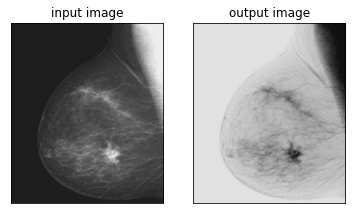

In [4]:
def Myneg(x):
  im = cv2.imread(path+x)
  s = np.ones((571,482,3) , np.uint8)
  s = s * 255
  s = s - im
  showResult(im, s)
  return

Myneg('breast_digital_Xray.tif')

(976, 746, 3)


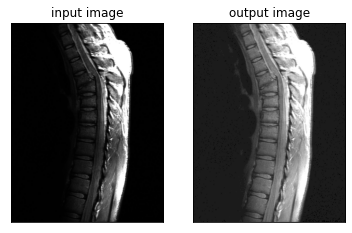

In [5]:
def Mypow(x):
  im = cv2.imread(path + x)
  print(im.shape)
  s = np.array(np.power(im /255, 0.4) *255, dtype = 'uint8')
  showResult(im, s)
  return

Mypow('fractured_spine.tif') 

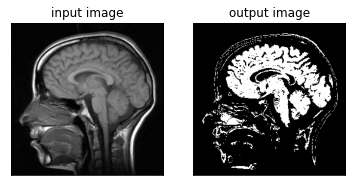

In [8]:
def Mygrayls(x):
  im = cv2.imread(path + x, 0)
  row, col = im.shape
  s = np.zeros((256, 256) , np.uint8)
  min = 100
  max = 140
  for i in range(row):
    for j in range(col):
      if im[i, j]>=min and im[i, j]<=max:
        s[i, j] = 255
      else:
        s[i, j] = 0
  showResult(im, s)
  return

Mygrayls('MRI.bmp')

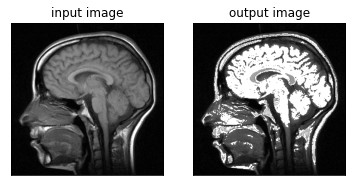

In [9]:
def MygraylsB(x):
  im = cv2.imread(path + x, 0)
  row, col = im.shape
  s = np.zeros((256, 256) , np.uint8)
  min = 100
  max = 140
  for i in range(row):
    for j in range(col):
      if im[i, j]>=min and im[i, j]<=max:
        s[i, j] = 255
      else:
        s[i, j] = im[i, j]
  showResult(im, s)
  return

MygraylsB('MRI.bmp')

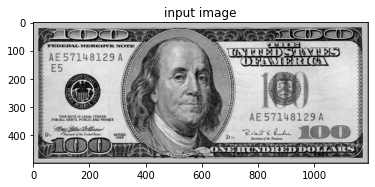

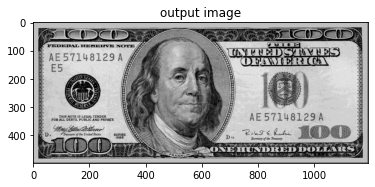

In [10]:
def Mybitps(x):
  im = cv2.imread(path + x, 0)
  row, col = im.shape
  s = np.zeros((row, col, 8), np.uint8)
  for i in range(row):
    for j in range(col):
      temp = np.binary_repr(im[i, j], width=8)
      for k in range(8):
        s[i, j, k] = int(temp[7-k])
  r = np.zeros((row, col),np.uint8)
  for i in range(row):
    for j in range(col):
      for k in range(4, 8):
        r[i, j] += int((s[i, j ,k] * (2**(k))))
  plt.title('input image'), plt.imshow(im, cmap='gray', vmin=0, vmax=255)
  plt.show()
  plt.title('output image'), plt.imshow(r, cmap='gray', vmin=0, vmax=255)
  plt.show()
  return

Mybitps('100-dollars.tif')